## Notebook Summary - Sentiment Analysis
#### This contents of this notebook includes:
- Code to calculate sentiment intensity scores and EDA on sentiment analysis scores

## Sentiment Analysis
---

In [5]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [6]:
#read in data
subs = pd.read_csv('cleaned_datasets/subreddits_combined.csv')
subs.head()

,author,text,text_length,word_count,subreddit
0,Missy_Pantone,Does anyone have experience with Sidmool Sacch...,83,11,asian_beauty
1,Rntonie35,Love my hair color! Blended nicely with my grays,51,9,asian_beauty
2,flckeringfox_,What’s your best eye cream to brighten the area?,51,9,asian_beauty
3,etoileneha,Has anyone tried the Beauty of Joseon - Red Be...,73,13,asian_beauty
4,bully-maguire23,klavuu pure pearlsation micro collagen cleansi...,59,7,asian_beauty


In [7]:
#Sentiment Analysis
sa = SentimentIntensityAnalyzer()

for row in subs[['text']].iterrows():
    idx, vals = row
    sentiments = sa.polarity_scores(vals['text'])
    subs.loc[idx, 'neg']=sentiments['neg']
    subs.loc[idx, 'pos']=sentiments['pos']
    subs.loc[idx, 'neu']=sentiments['neu']
    subs.loc[idx, 'compound']=sentiments['compound']

In [8]:
subs.head()

,author,text,text_length,word_count,subreddit,neg,pos,neu,compound
0,Missy_Pantone,Does anyone have experience with Sidmool Sacch...,83,11,asian_beauty,0.0,0.219,0.781,0.4215
1,Rntonie35,Love my hair color! Blended nicely with my grays,51,9,asian_beauty,0.0,0.514,0.486,0.8122
2,flckeringfox_,What’s your best eye cream to brighten the area?,51,9,asian_beauty,0.0,0.504,0.496,0.7964
3,etoileneha,Has anyone tried the Beauty of Joseon - Red Be...,73,13,asian_beauty,0.0,0.257,0.743,0.5859
4,bully-maguire23,klavuu pure pearlsation micro collagen cleansi...,59,7,asian_beauty,0.0,0.000,1.000,0.0000


The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
- positive sentiment : (compound score >= 0.05) 
- neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
- negative sentiment : (compound score <= -0.05

https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

In [9]:
# add a column that categorizes compound ratings
subs['compound_cat'] = ['positive' if s >= 0.05 else 'neutral' if ((s > -0.05) & (s < 0.05)) else 'negative' for s in subs['compound']]

In [10]:
subs.head()

,author,text,text_length,word_count,subreddit,neg,pos,neu,compound,compound_cat
0,Missy_Pantone,Does anyone have experience with Sidmool Sacch...,83,11,asian_beauty,0.0,0.219,0.781,0.4215,positive
1,Rntonie35,Love my hair color! Blended nicely with my grays,51,9,asian_beauty,0.0,0.514,0.486,0.8122,positive
2,flckeringfox_,What’s your best eye cream to brighten the area?,51,9,asian_beauty,0.0,0.504,0.496,0.7964,positive
3,etoileneha,Has anyone tried the Beauty of Joseon - Red Be...,73,13,asian_beauty,0.0,0.257,0.743,0.5859,positive
4,bully-maguire23,klavuu pure pearlsation micro collagen cleansi...,59,7,asian_beauty,0.0,0.000,1.000,0.0000,neutral


In [11]:
#export dataset with sentiment data
subs.to_csv('cleaned_datasets/subs_sentiment_analysis.csv')

In [12]:
# take a look at descriptive statistics for sentiment analysis scores
subs[['neg', 'pos', 'neu', 'compound', 'subreddit']].groupby('subreddit').describe().T

subreddit       asian_beauty  skincare_addiction
neg      count   5067.000000         7808.000000
         mean       0.032406            0.054106
         std        0.067071            0.071709
         min        0.000000            0.000000
         25%        0.000000            0.000000
         50%        0.000000            0.033000
         75%        0.039000            0.083000
         max        0.593000            0.659000
pos      count   5067.000000         7808.000000
         mean       0.139500            0.109345
         std        0.141913            0.099203
         min        0.000000            0.000000
         25%        0.000000            0.024000
         50%        0.118000            0.098000
         75%        0.220000            0.160000
         max        0.840000            0.771000
neu      count   5067.000000         7808.000000
         mean       0.828097            0.836546
         std        0.150152            0.114147
         min        0.160000            0.133000
         25%        0.740000            0.776000
         50%        0.833000            0.840500
         75%        1.000000            0.907000
         max        1.000000            1.000000
compound count   5067.000000         7808.000000
         mean       0.361919            0.295624
         std        0.461143            0.568075
         min       -0.980200           -0.995500
         25%        0.000000            0.000000
         50%        0.440400            0.401900
         75%        0.784500            0.820500
         max        0.999900            0.999900

''

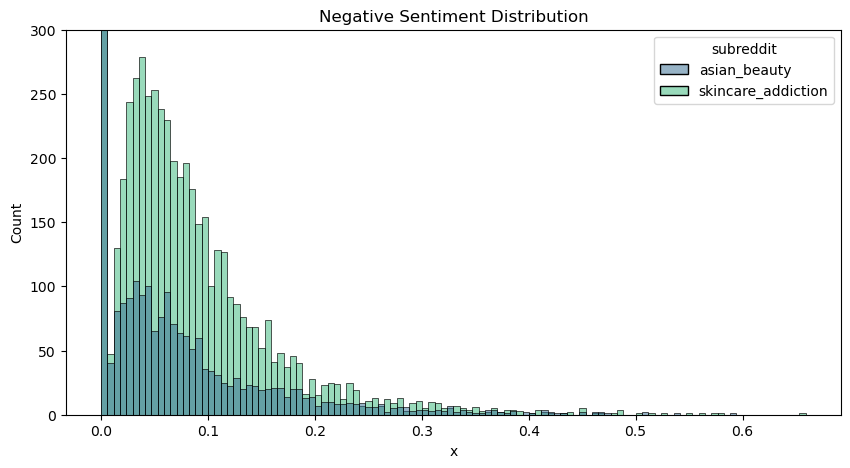

In [13]:
# plot the distribution of negative sentiment scores
plt.figure(figsize=(10,5))
sns.histplot(data=subs, x='neg', hue='subreddit', palette='viridis')
plt.title('Negative Sentiment Distribution')
plt.xlabel('x')
# plt.xlim(0,0.5)
plt.ylim(0,300)
;

based on the distribution it looks like skincare_addiction live closer to neutral to mean/median than the asian_beauty does

''

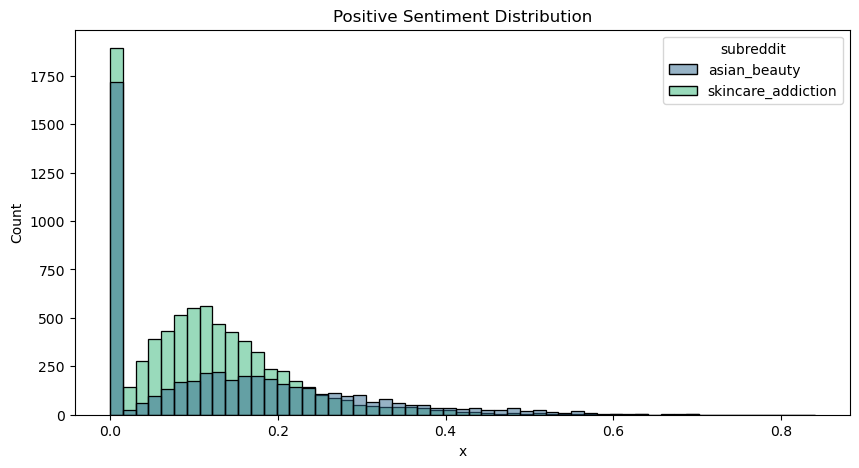

In [14]:
# plot the distribution of positive sentiment scores
plt.figure(figsize=(10,5))
sns.histplot(data=subs, x='pos', hue='subreddit', palette='viridis')
plt.title('Positive Sentiment Distribution')
plt.xlabel('x')

;

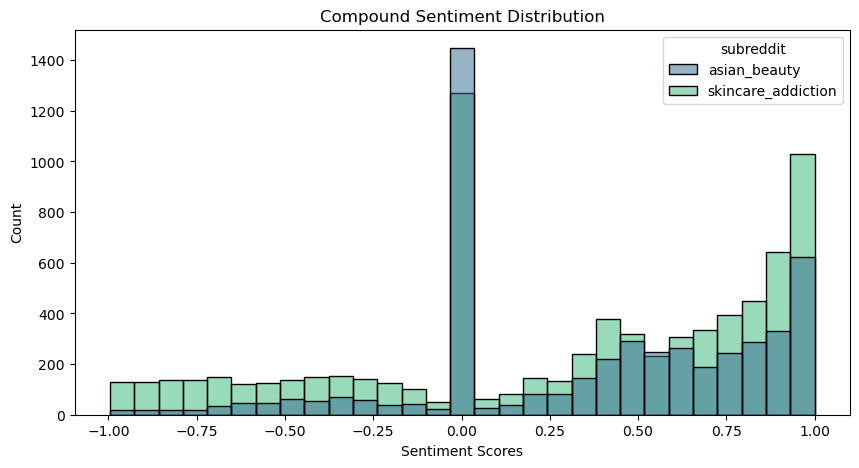

In [15]:
# plot the distribution of compound sentiment scores
plt.figure(figsize=(10,5))
sns.histplot(data=subs, x='compound', hue='subreddit', palette='viridis')
plt.title('Compound Sentiment Distribution');
plt.xlabel('Sentiment Scores');
# plt.xlim(0, 0.5)
# plt.ylim(0,200)

# plt.savefig('plots/top25percentwords.png',dpi=300, bbox_inches = "tight")

### *Lots of neutral posts across both subreddits*

In [16]:
subs.describe().T

,count,mean,std,min,25%,50%,75%,max
text_length,12875.0,458.524660,808.286993,31.0000,77.000,206.0000,564.00000,24449.0000
word_count,12875.0,79.994175,135.468753,3.0000,13.000,37.0000,101.00000,3582.0000
neg,12875.0,0.045566,0.070717,0.0000,0.000,0.0000,0.06900,0.6590
pos,12875.0,0.121213,0.118785,0.0000,0.000,0.1040,0.18100,0.8400
neu,12875.0,0.833221,0.129577,0.1330,0.763,0.8380,0.92400,1.0000
compound,12875.0,0.321715,0.529552,-0.9955,0.000,0.4199,0.80685,0.9999


#### Taking a look at sentiment scores for top 25% word_count posts

(0.0, 200.0)

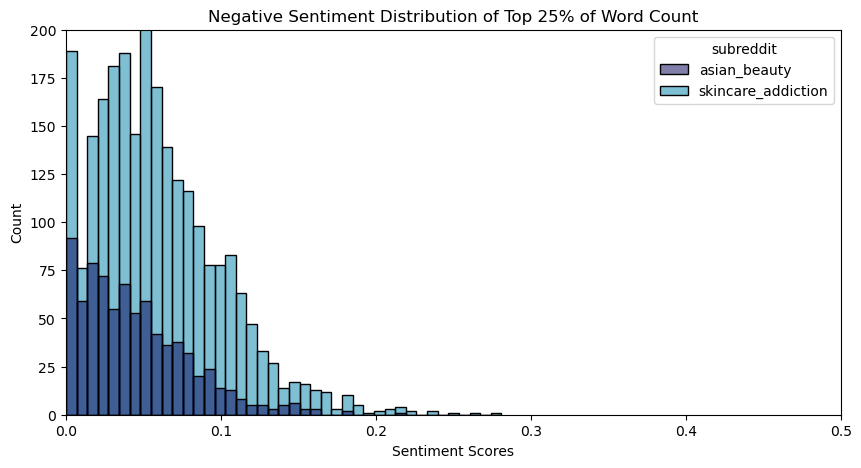

In [17]:
top = subs[(subs['word_count'] >= 100)]
plt.figure(figsize=(10,5))
sns.histplot(data=top, x='neg', hue='subreddit', palette='ocean');
plt.title('Negative Sentiment Distribution of Top 25% of Word Count')
plt.xlabel('Sentiment Scores')
plt.xlim(0,0.5)
plt.ylim(0,200)

(0.0, 200.0)

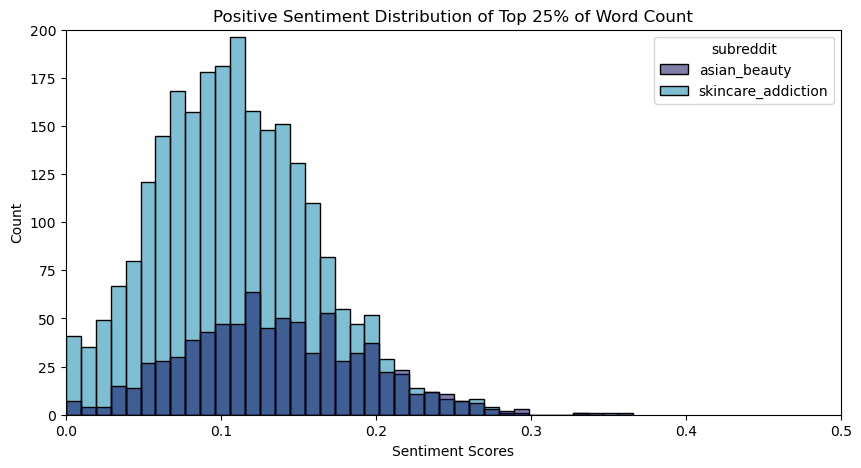

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(data=top, x='pos', hue='subreddit', palette='ocean')
plt.title('Positive Sentiment Distribution of Top 25% of Word Count');
plt.xlabel('Sentiment Scores')
plt.xlim(0, 0.5)
plt.ylim(0,200)

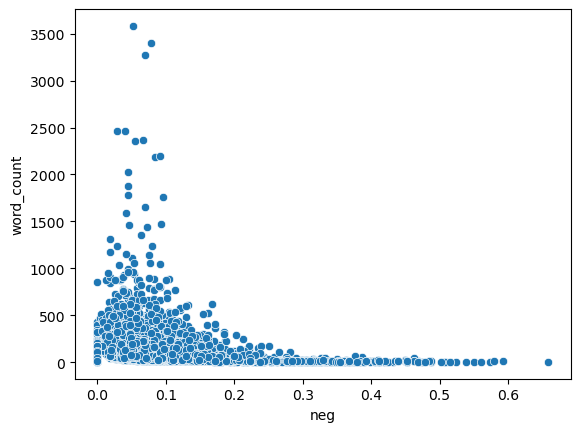

In [19]:
# scatter plot of word count to neg sentiment score
sns.scatterplot(data=subs, x='neg', y='word_count');

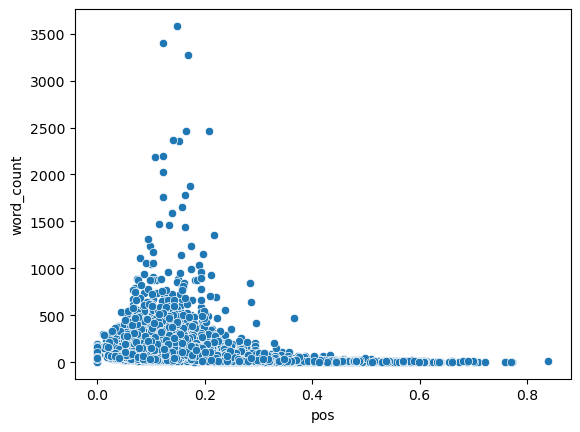

In [20]:
# scatter plot of word count to pos sentiment score
sns.scatterplot(data=subs, x='pos', y='word_count');

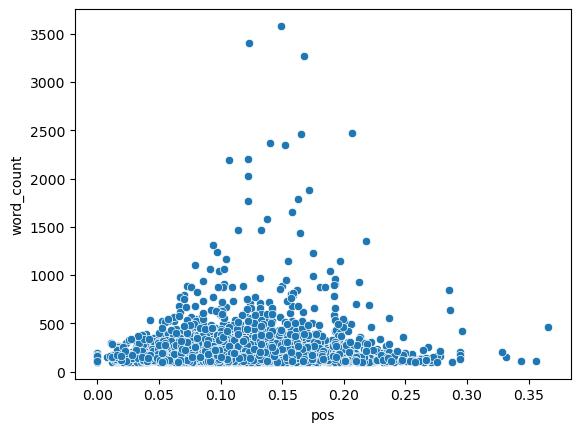

In [21]:
sns.scatterplot(data=top, x='pos', y='word_count');

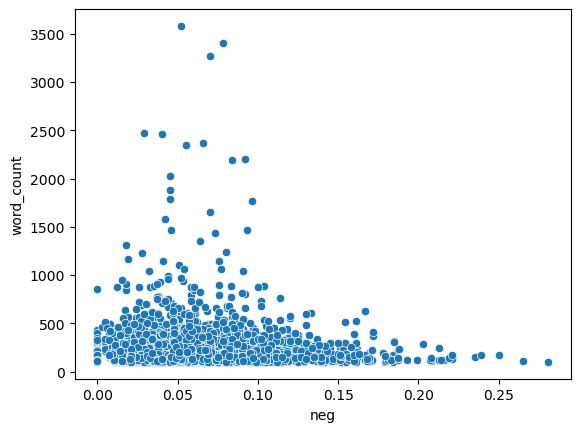

In [22]:
sns.scatterplot(data=top, x='neg', y='word_count');
#this debunked my idea that longer posts are more negative than shorter posts. A lot of the longer posts are at the lower range of neg sent score

### *Overall not seeing anything specifically insightful in the scatter plots*

In [23]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB    #classifier commonly used for nlp dta #BernoulliNB when data is 0/1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from imblearn.datasets import make_imbalance
from imblearn.pipeline import make_pipeline   ##imbalanced learn has it's own make pipeline function similar to the make_pipeline that's in scikit-learn
from imblearn.over_sampling import RandomOverSampler
import os
from sklearn import metrics
import pickle

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# skopt imports
from skopt.space import Integer, Real, Categorical   #these are necessary to get BayesSearchCV to run
from skopt import BayesSearchCV

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 2000




In [24]:
#read in data & drop unnamed col
subs = pd.read_csv('cleaned_datasets/subs_cleaned_forCVEC.csv')
subs.head()

,subreddit,text,text_length,word_count,neg,pos,neu,compound
0,asian_beauty,do anyone have experience with sidmool saccharo ferment sparkle first ampoule,83,11,0.0,0.219,0.781,0.4215
1,asian_beauty,love my hair color blend nicely with my gray,51,9,0.0,0.514,0.486,0.8122
2,asian_beauty,what be your good eye cream to brighten the area,51,9,0.0,0.470,0.530,0.7964
3,asian_beauty,have anyone try the beauty of joseon red bean refreshing pore mask,73,13,0.0,0.257,0.743,0.5859
4,asian_beauty,klavuu pure pearlsation micro collagen cleanse water,59,7,0.0,0.000,1.000,0.0000


In [25]:
subs.shape

(12885, 8)

In [4]:
subs['subreddit'].value_counts()

skincare_addiction    7811
asian_beauty          5074
Name: subreddit, dtype: int64

In [5]:
#baseline accuracy
subs['subreddit'].value_counts(normalize=True)

skincare_addiction    0.606209
asian_beauty          0.393791
Name: subreddit, dtype: float64

In [6]:
subs.isna().sum()

subreddit      0
text           0
text_length    0
word_count     0
neg            0
pos            0
neu            0
compound       0
dtype: int64

In [7]:
# changing target variable to binary
subs['subreddit'] = np.where(subs['subreddit'] == 'skincare_addiction', 1, 0)

## skincare_addiction - 1 / asian_beauty - 0

In [8]:
subs.head(1)

,subreddit,text,text_length,word_count,neg,pos,neu,compound
0,0,do anyone have experience with sidmool saccharo ferment sparkle first ampoule,83,11,0.0,0.219,0.781,0.4215


In [9]:
subs.columns

Index(['subreddit', 'text', 'text_length', 'word_count', 'neg', 'pos', 'neu',
       'compound'],
      dtype='object')

In [10]:
#assign X & y
X=subs.drop(columns='subreddit')
y=subs['subreddit']

In [11]:
#split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=17)

In [12]:
print('original df:', subs.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

original df: (12885, 8)
X_train: (9663, 7)
y_train: (9663,)
X_test: (3222, 7)
y_test: (3222,)


### Baseline Accuracy

In [13]:
y.value_counts(normalize=True)

1    0.606209
0    0.393791
Name: subreddit, dtype: float64

In [14]:
y_train.value_counts(normalize=True)

1    0.60623
0    0.39377
Name: subreddit, dtype: float64

In [15]:
y_test.value_counts(normalize=True) #if I guess the majority class every time

1    0.606145
0    0.393855
Name: subreddit, dtype: float64

### BayesSearchCV on CountVectorizor ###

In [16]:
#make a pipeline for countvectorizer & Bernoulli nb

#instantiate CVEC
cvec = CountVectorizer(stop_words='english',
                       ngram_range=(1,3),
                       token_pattern=r'[\w\’\`\‘\'\´]+')   #eliminate words that appear in less than 2 docs/rows
                    
sc =StandardScaler()

#make column transformer to countvectorizer just the text column
col_trans = make_column_transformer(
    (cvec, 'text'),
    # (sc, ['text_length', 'word_count', 'neg', 'pos', 'neu','compound']), #do i standardize binary target val?
    remainder='passthrough',
    verbose_feature_names_out=False
)
    
#create a pipeline
bs_pipe = Pipeline([
    ('transformer', col_trans),
    ('bn', BernoulliNB())  # 'mnb', MultinomialNB()
])

# Search over the following values of hyperparameters:
# max_features = Maximum number of features fit
# min_df = Minimum number of documents needed to include token
# max_df = Maximum number of documents needed to include token 
# Check (individual tokens) and also check (individual tokens and 2-grams)

#pipe params
bs_params = {
    'transformer__countvectorizer__max_features': Integer(1,20000),  # 50000 was originally the best param so re-tuning, 100_000
    'transformer__countvectorizer__min_df': Integer(1,500),     
    'transformer__countvectorizer__max_df': Real(0.50,0.95),
    # 'transformer__countvectorizer__ngram_range': [(1,1), (1,2)]   #need to put up top since I'm using BayesSearchCV
}


#Instantiate BayesSearchCV
bs = BayesSearchCV(
    estimator = bs_pipe,
    search_spaces = bs_params,
    scoring = 'f1_weighted',
    n_iter = 50,
    verbose = 1,
    cv = 5,
    n_jobs=-1
)

In [17]:
#commenting out so I don't re-run

# #fit on training data
# bs.fit(X_train, y_train)

In [18]:
#commenting out because it's already been pickled

# pickle.dump(bs, open('bs.pkl', 'wb'))

In [20]:
# Loading model to compare the results
bs = pickle.load(open('pickles/bs.pkl','rb'))

In [21]:
bs.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'bn', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__countvectorizer', 'transformer__standardscaler', 'transformer__countvectorizer__analyzer', 'transformer__countvectorizer__binary', 'transformer__countvectorizer__decode_error', 'transformer__countvectorizer__dtype', 'transformer__countvectorizer__encoding', 'transformer__countvectorizer__input', 'transformer__countvectorizer__lowercase', 'transformer__countvectorizer__max_df', 'transformer__countvectorizer__max_features', 'transformer__countvectorizer__min_df', 'transformer__countvectorizer__ngram_range', 'transformer__countvectorizer__preprocessor', 'transformer__countvectorizer__stop_words', 'transformer__countvectorizer__strip_accents', 'transformer__countvectorizer__token_pattern', 'transformer__co

In [22]:
bs.best_params_

#first time I ran it, I noticed that the max_features is at the top of my range so going to retune

OrderedDict([('transformer__countvectorizer__max_df', 0.95),
             ('transformer__countvectorizer__max_features', 5355),
             ('transformer__countvectorizer__min_df', 1)])

In [23]:
bs.best_score_

#score is lower than when I tried 50_000/100_000, but that just seemed like way too many features

0.7313585875080324

In [24]:
bs.score(X_train, y_train)

0.7408866350899261

In [25]:
bs.score(X_test, y_test)

0.7261420495616562

#### *score is better than baseline and about the same on both test and train*

### BayesSearchCV on TFIDVec

In [26]:
#instantiate TFIDVec
tvec = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,3),
                       token_pattern=r'[\w\’\`\‘\'\´]+')   #eliminate words that appear in less than 2 docs/rows
                    
sc =StandardScaler()

#make column transformer to countvectorizer just the text column
col_trans = make_column_transformer(
    (tvec, 'text'),
    (sc, ['text_length', 'word_count', 'neg', 'pos', 'neu','compound']), #do i standardize binary target val?
    remainder='passthrough',
    verbose_feature_names_out=False
)
    
#create a pipeline
bs2_pipe = Pipeline([
    ('transformer', col_trans),
    ('bn', BernoulliNB())  # 'mnb', MultinomialNB()
])

# Search over the following values of hyperparameters:
# max_features = Maximum number of features fit
# min_df = Minimum number of documents needed to include token
# max_df = Maximum number of documents needed to include token 
# Check (individual tokens) and also check (individual tokens and 2-grams)

#pipe params
bs2_params = {
    'transformer__tfidfvectorizer__max_features': Integer(1,20000),  # 50000 was originally the best param so re-tuning, 100_000
    'transformer__tfidfvectorizer__min_df': Integer(1,500),     
    'transformer__tfidfvectorizer__max_df': Real(0.50,0.95),
    # 'transformer__countvectorizer__ngram_range': [(1,1), (1,2)]   #need to put up top since I'm using BayesSearchCV
}


#Instantiate BayesSearchCV
bs2 = BayesSearchCV(
    estimator = bs2_pipe,
    search_spaces = bs2_params,
    scoring = 'f1_weighted',
    n_iter = 50,
    verbose = 1,
    cv = 5,
    n_jobs=-1
)

In [27]:
bs2.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'bn', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__tfidfvectorizer', 'transformer__standardscaler', 'transformer__tfidfvectorizer__analyzer', 'transformer__tfidfvectorizer__binary', 'transformer__tfidfvectorizer__decode_error', 'transformer__tfidfvectorizer__dtype', 'transformer__tfidfvectorizer__encoding', 'transformer__tfidfvectorizer__input', 'transformer__tfidfvectorizer__lowercase', 'transformer__tfidfvectorizer__max_df', 'transformer__tfidfvectorizer__max_features', 'transformer__tfidfvectorizer__min_df', 'transformer__tfidfvectorizer__ngram_range', 'transformer__tfidfvectorizer__norm', 'transformer__tfidfvectorizer__preprocessor', 'transformer__tfidfvectorizer__smooth_idf', 'transformer__tfidfvectorizer__stop_words', 'transformer__tfidfvectorize

In [28]:
#commenting out so I don't rerun

# bs2.fit(X_train, y_train)

In [29]:
#commenting out because it's already been pickled

# pickle.dump(bs2, open('bs2.pkl', 'wb'))

In [31]:
# Loading model to compare the results
bs2 = pickle.load(open('pickles/bs2.pkl','rb'))

In [32]:
bs2.best_params_

OrderedDict([('transformer__tfidfvectorizer__max_df', 0.7353778477590758),
             ('transformer__tfidfvectorizer__max_features', 5479),
             ('transformer__tfidfvectorizer__min_df', 1)])

In [33]:
bs2.best_score_

0.73112820425187

In [34]:
bs2.score(X_train, y_train)

0.7410930999225238

In [35]:
bs2.score(X_test, y_test)

0.7267623393701236

#### *got similar scores compared to using the cvec, but the max_features are different*

### With the best params above from bs2, I'll transform my data

In [36]:
X_train.head(5)

,text,text_length,word_count,neg,pos,neu,compound
9880,permanent discolouration between brow hi to give some context I have have this for several year I pluck quite often and I use to have pimple between the brow this discolouration have pretty much affect my self esteem and confidence when talk to people and I have try to do my own research online but to no avail do anyone have any solution for this https I imgur com m6uhm77 jpg,402,67,0.061,0.093,0.846,0.2960
12654,sodium sulfacetamide 10 wash anyone else try and have success hi everyone longtime lurker here I have not see this topic post before so I be just wonder have anyone else ever try a sodium sulfacetamide wash I start use a 10 wash with aloe and green tea prescribe to me by my dermatologist and I be kind of obsess with it now a little background I have struggle with cystic acne for my entire life f 30 and have be on every acne fight prescription possible short of accutane with vary result last year my current dermatologist prescribe me retin a and epiduo both of which work pretty well for a while I be washing twice a day with cetaphil and follow with retin a moisturizer at night and epiduo sunscreen and moisturizer in the morning then seemingly out of nowhere my acne flare up again early this fall probably due to stress and change my birth control the retin a and epiduo be not cut it anymore so I try a few other product base on suggestion in this subreddit but nothing be work when I be in my hometown for thanksgiving I visit my childhood dermatologist and he prescribe me a mild oral antibiotic and a sodium sulfacetamide 10 wash I have be use it twice a day for about a month now pair with my remain retin a at night and I swear my skin have never look well my skin tone be more even dark spot be start to disappear and I have not have a cystic pimple pop up since I start just wonder if anyone else have have any experience with this treatment or if you have any suggestion for me my routine morning wash face with ss10 moisturize with neutrogena rapid tone repair spf30 follow with normal make up routine laura merci hydrate primer lm oil free tint moisturizer light powder evening remove make up currently use a random sensitive skin make up remover that be on sale at cvs I be not sure if I like it so any suggestion would be welcome wash with ss10 follow up with retin a and moisturizer currently use a keihl wrinkle reduce cream that I get as a sample and like a lot,2168,366,0.056,0.033,0.911,-0.7589
935,discussion what be your go to base makeup routine when you be in a hurry,76,13,0.000,0.000,1.000,0.0000
8779,tiny bump on the chin and a few around the mouth area they be painless and appear to be deep beneath the skin I believe they develop after my acne be treat with accutane it be be a few year now not sure what this be or how to get rid of it,259,51,0.038,0.048,0.913,0.1356
10381,humor lather rinse repeat,32,4,0.000,0.000,1.000,0.0000


In [37]:
#instantiate tfidVectorizer
tfidvec = TfidfVectorizer(
    max_df= 0.7353778477590758,
    max_features= 5479,  #bayessearch on tfid returned this as an optimal val
    min_df = 1,
    stop_words='english',
    ngram_range=(1,3),
    token_pattern=r'[\w\’\`\‘\'\´]+'
)

In [38]:
#fit & transform the corpus
#convert to a df since it get returned as a sparse matrix
X_train_vec = pd.DataFrame(
    tfidvec.fit_transform(X_train['text']).todense(),
    columns = tfidvec.get_feature_names_out(),
    index = X_train.index)

In [39]:
X_train_vec

,',0,0 025,0 05,0 1,0 3,0 5,00,01,02,...,yul,zero,zinc,zinc 1,zinc oxide,zinc pyrithione,zit,zone,zone dry,zone oily
9880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#fit & transform the test corpus
#convert to a df since it get returned as a sparse matrix
X_test_vec = pd.DataFrame(
    tfidvec.transform(X_test['text']).todense(),
    columns = tfidvec.get_feature_names_out(),
    index = X_test.index)

X_test_vec.head()

,',0,0 025,0 05,0 1,0 3,0 5,00,01,02,...,yul,zero,zinc,zinc 1,zinc oxide,zinc pyrithione,zit,zone,zone dry,zone oily
1802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Concatenate vectorized df with original dfs (Train/Test)

In [41]:
#concatenate X_train & X_test with vectorized
X_train2 = pd.concat([X_train, X_train_vec], axis = 1)
X_test2 = pd.concat([X_test, X_test_vec], axis = 1)

In [42]:
X_train2

,text,text_length,word_count,neg,pos,neu,compound,',0,0 025,...,yul,zero,zinc,zinc 1,zinc oxide,zinc pyrithione,zit,zone,zone dry,zone oily
9880,permanent discolouration between brow hi to give some context I have have this for several year I pluck quite often and I use to have pimple between the brow this discolouration have pretty much affect my self esteem and confidence when talk to people and I have try to do my own research online but to no avail do anyone have any solution for this https I imgur com m6uhm77 jpg,402,67,0.061,0.093,0.846,0.2960,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12654,sodium sulfacetamide 10 wash anyone else try and have success hi everyone longtime lurker here I have not see this topic post before so I be just wonder have anyone else ever try a sodium sulfacetamide wash I start use a 10 wash with aloe and green tea prescribe to me by my dermatologist and I be kind of obsess with it now a little background I have struggle with cystic acne for my entire life f 30 and have be on every acne fight prescription possible short of accutane with vary result last year my current dermatologist prescribe me retin a and epiduo both of which work pretty well for a while I be washing twice a day with cetaphil and follow with retin a moisturizer at night and epiduo sunscreen and moisturizer in the morning then seemingly out of nowhere my acne flare up again early this fall probably due to stress and change my birth control the retin a and epiduo be not cut it anymore so I try a few other product base on suggestion in this subreddit but nothing be work when I be in my hometown for thanksgiving I visit my childhood dermatologist and he prescribe me a mild oral antibiotic and a sodium sulfacetamide 10 wash I have be use it twice a day for about a month now pair with my remain retin a at night and I swear my skin have never look well my skin tone be more even dark spot be start to disappear and I have not have a cystic pimple pop up since I start just wonder if anyone else have have any experience with this treatment or if you have any suggestion for me my routine morning wash face with ss10 moisturize with neutrogena rapid tone repair spf30 follow with normal make up routine laura merci hydrate primer lm oil free tint moisturizer light powder evening remove make up currently use a random sensitive skin make up remover that be on sale at cvs I be not sure if I like it so any suggestion would be welcome wash with ss10 follow up with retin a and moisturizer currently use a keihl wrinkle reduce cream that I get as a sample and like a lot,2168,366,0.056,0.033,0.911,-0.7589,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
935,discussion what be your go to base makeup routine when you be in a hurry,76,13,0.000,0.000,1.000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8779,tiny bump on the chin and a few around the mouth area they be painless and appear to be deep beneath the skin I believe they develop after my acne be treat with accutane it be be a few year now not sure what this be or how to get rid of it,259,51,0.038,0.048,0.913,0.1356,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10381,humor lather rinse repeat,32,4,0.000,0.000,1.000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,lose 10 lb recently and my skin be rapidly dry out and sag develop a third eyelid more in comment,116,20,0.113,0.000,0.887,-0.3182,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8854,what be go on with my skin,33,7,0.000,0.000,1.000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6262,sun care shiseido ultimate sun protector lotion spf 50 applicator since the sunscreen be runny liquidy and there be no pump everytime I try to get product out it always overflow I have see this kind of a thing on some bottle https medium allure com photo 5f568ea5a47c64ea03612d1d master

In [43]:
X_test2

,text,text_length,word_count,neg,pos,neu,compound,',0,0 025,...,yul,zero,zinc,zinc 1,zinc oxide,zinc pyrithione,zit,zone,zone dry,zone oily
1802,discussion what be your hg product for over exfoliate skin barrier repair soothe etc,101,14,0.103,0.000,0.897,-0.1280,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1688,no retinoid retinol retinyl palmitate only asian product use and here be my journey,90,11,0.211,0.000,0.789,-0.4466,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
963,aggressively glowy dewy cushion foundation 2022 edition just want to ask for update recommendation,107,15,0.161,0.000,0.839,-0.3182,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11614,help what be these from and how to get rid of them I have these weird pimple like bump all over my shoulder I have never have this problem before and I do not know why it be happen I be currently travel in vietnam could it have something to do with the heat please help picture http imgur com htrfgmx,318,57,0.076,0.166,0.758,0.6875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3711,I guess I be a little too excited about use my tonymoly banana sleep pack for the first time last night,112,21,0.000,0.111,0.889,0.2782,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,question please help what ingredient s in mizon snail ampoule could be give me blackhead and what could be a good replacement for increase collagen and elastin production I be so super excited for this ampoule http www skinandtonic com mizon snail repair intensive ampoule review especially after skin and tonic awesome review I love how she break down the ingredient I be definitely look for a product to boost collagen and elastin production and originally I be a little sceptical about the snail mucin part of this product but it prove to be awesome almost immediately I have the flu for a week and my nose be red raw and dry from blow my nose every two second so I think what the hey and slather it in the mizon ampoule before bed the whole point of snail mucin be that it be repair right I wake up in the morning and although my skin be still a little dry and flaky it have heal so much i wish I would take picture it be that amazing with a squeal of excitement I start use the product as part of my routine day and night super excited to rub all the benefit into my skin thinking I have find a serious holy grail then I start get blackhead I hardly ever get blackhead normally I get close comedo instead but suddenly I be get roughly 10 20 blackhead on my face at a time some on my forehead and some on my chin unfortunately the ampoule have to stop so in term of this product ingredient what could be cause the blackhead and what other product be out there with pentapeptide 4 copper tripeptide 1 and human ogliopeptide 1 or a similar list pack with awesome ingredient for collagen and elastin production here be a full list of the ingredient snail secretion filtrate sodium hyaluronate butylene glycol glycerin alcohol panthenol glycereth 26 punica granatum extract theobroma cacao cocoa extract carbomer triethanolamine trehalose copper tripeptide 1 human ogliopeptide 1 palmitoyl pentapeptide 4 cornus officinali fruit extract nelumbo nucifera flower extract caprylyl glyocol ethylhexyl...,2405,372,0.055,0.194,0.751,0.9961,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,how to get rid of these spot,33,7,0.000,0.000,1.000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3424,first ever ab product purchase so excited to try them out,64,11,0.000,0.230,0.770,0.4561,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7788,acne advice hospital maskne in australia hi guy new here I just start a new job in a respiratory ward in a hospital so mask but be wear the entire day and my maskne be terrible and my skin be so dry I think I have come down to understand I need a well moisturiz

#### Choosing to drop this column because it wasn't eliminated through pre-processing

In [44]:
# dropping this character column
X_train2.drop(columns="'", inplace=True)
X_test2.drop(columns="'", inplace=True)

In [49]:
#export datasets to csv
X_train2.to_csv('cleaned_datasets/Modeling/X_train.csv')
X_test2.to_csv('cleaned_datasets/Modeling/X_test.csv')
y_train.to_csv('cleaned_datasets/Modeling/y_train.csv')
y_test.to_csv('cleaned_datasets/Modeling/y_test.csv')

In [47]:
y_train

9880     1
12654    1
935      0
8779     1
10381    1
        ..
7762     1
8854     1
6262     1
6042     1
1319     0
Name: subreddit, Length: 9663, dtype: int64

In [46]:
y_test

1802     0
1688     0
963      0
11614    1
3711     0
        ..
4648     0
12348    1
3424     0
7788     1
5372     1
Name: subreddit, Length: 3222, dtype: int64